In [2]:
import numpy as np
from astropy.io import fits
import healpy as hp
import pandas as pd
from desiutil.plots import plot_sky_binned
import matplotlib.pyplot as plt
import pickle




### Retrieving the relevant CCD Data

In [71]:
#decamCCD = fits.open('../bricks_data/ccds-annotated-90prime-dr9.fits')


decamCCD = fits.open('../bricks_data/ccds-annotated-decam-dr9.fits')
mosaicCCD = fits.open('../bricks_data/ccds-annotated-mosaic-dr9.fits')
bassCCD = fits.open('../bricks_data/ccds-annotated-90prime-dr9.fits')
print(decamCCD[1].columns)


ColDefs(
    name = 'image_filename'; format = '120A'
    name = 'image_hdu'; format = 'I'
    name = 'camera'; format = '5A'
    name = 'expnum'; format = 'K'
    name = 'plver'; format = '8A'
    name = 'procdate'; format = '19A'
    name = 'plprocid'; format = '7A'
    name = 'ccdname'; format = '3A'
    name = 'object'; format = '35A'
    name = 'propid'; format = '10A'
    name = 'filter'; format = '1A'
    name = 'exptime'; format = 'E'
    name = 'mjd_obs'; format = 'D'
    name = 'airmass'; format = 'E'
    name = 'fwhm'; format = 'E'
    name = 'width'; format = 'I'
    name = 'height'; format = 'I'
    name = 'ra_bore'; format = 'D'
    name = 'dec_bore'; format = 'D'
    name = 'crpix1'; format = 'E'
    name = 'crpix2'; format = 'E'
    name = 'crval1'; format = 'D'
    name = 'crval2'; format = 'D'
    name = 'cd1_1'; format = 'E'
    name = 'cd1_2'; format = 'E'
    name = 'cd2_1'; format = 'E'
    name = 'cd2_2'; format = 'E'
    name = 'yshift'; format = 'L'
    name = 

In [72]:
dataDecam = decamCCD[1].data
dataMosaic = mosaicCCD[1].data
dataBass = bassCCD[1].data

In [78]:
#ra0 = np.concatenate((dataDecam.field('ra0'), dataMosaic.field('ra0'), dataBass.field('ra0')), axis=0)
print(len(ra0))
ra0_decam  = dataDecam.field('ra0')
ra0_mosaic = dataMosaic.field('ra0')
ra0_bass =dataBass.field('ra0')
print(len(ra0_decam) +  len(ra0_mosaic) + len(ra0_bass))

6776431
6776431


In [79]:
ra0 = np.concatenate((dataDecam.field('ra0'), dataMosaic.field('ra0'), dataBass.field('ra0')), axis=0)
dec0 = np.concatenate((dataDecam.field('dec0'), dataMosaic.field('dec0'), dataBass.field('dec0')), axis=0)

ra1 = np.concatenate((dataDecam.field('ra1'), dataMosaic.field('ra1'), dataBass.field('ra1')), axis=0)
dec1 = np.concatenate((dataDecam.field('dec1'), dataMosaic.field('dec1'), dataBass.field('dec1')), axis=0)

ra2 = np.concatenate((dataDecam.field('ra2'), dataMosaic.field('ra2'), dataBass.field('ra2')), axis=0)
dec2 = np.concatenate((dataDecam.field('dec2'), dataMosaic.field('dec2'), dataBass.field('dec2')), axis=0)

ra3 = np.concatenate((dataDecam.field('ra3'), dataMosaic.field('ra3'), dataBass.field('ra3')), axis=0)
dec3 = np.concatenate((dataDecam.field('dec3'), dataMosaic.field('dec3'), dataBass.field('dec3')), axis=0)


6776431
[[ 0.70633408  0.11278378 -0.69883617]
 [ 0.70547397  0.11794218 -0.69885344]
 [ 0.70367345  0.11763693 -0.70071766]
 [ 0.70453374  0.11248107 -0.7006998 ]] DECAM Ordering, 0,1,2,3
[666896 666897 667872 667873 668844 668845]
[[ 0.70547397  0.11794218 -0.69885344]
 [ 0.70633408  0.11278378 -0.69883617]
 [ 0.70453374  0.11248107 -0.7006998 ]
 [ 0.70367345  0.11763693 -0.70071766]] BASS Ordering, 1,0,3,2
[666896 666897 667872 667873 668844 668845]
[[ 0.70453374  0.11248107 -0.7006998 ]
 [ 0.70367345  0.11763693 -0.70071766]
 [ 0.70547397  0.11794218 -0.69885344]
 [ 0.70633408  0.11278378 -0.69883617]] MzLS Ordering, 3,2,1,0
[666896 666897 667872 667873 668844 668845]


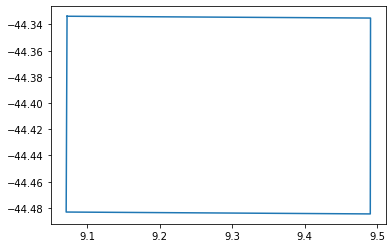

In [80]:
# This cell proves that ordering does not matter for the polygon functions I wrote, they return the same pixels regardless of catalogue

print(len(ra0))
cc = 345
xs = [ra0[cc],ra1[cc], ra2[cc], ra3[cc],ra0[cc] ]
ys = [dec0[cc],dec1[cc], dec2[cc], dec3[cc],dec0[cc]]
plt.plot(xs,ys)

x_coord_polygon = np.array([ra0[cc],ra1[cc], ra2[cc], ra3[cc]])
y_coord_polygon = np.array([dec0[cc],dec1[cc], dec2[cc], dec3[cc]])
theta, phi = raDec2thetaPhi(x_coord_polygon, y_coord_polygon)
ccd_vertices_3d = hp.ang2vec(theta=theta, phi=phi)
print(ccd_vertices_3d, "DECAM Ordering, 0,1,2,3")
print(hp.query_polygon(nside=NSIDE, vertices=ccd_vertices_3d, inclusive=True))

x_coord_polygon = np.array([ra1[cc], ra0[cc],  ra3[cc], ra2[cc]])
y_coord_polygon = np.array([dec1[cc], dec0[cc], dec3[cc], dec2[cc]])
theta, phi = raDec2thetaPhi(x_coord_polygon, y_coord_polygon)
ccd_vertices_3d = hp.ang2vec(theta=theta, phi=phi)
print(ccd_vertices_3d, "BASS Ordering, 1,0,3,2")
print(hp.query_polygon(nside=NSIDE, vertices=ccd_vertices_3d, inclusive=True))


x_coord_polygon = np.array([ra3[cc], ra2[cc],  ra1[cc], ra0[cc]])
y_coord_polygon = np.array([dec3[cc], dec2[cc], dec1[cc], dec0[cc]])
theta, phi = raDec2thetaPhi(x_coord_polygon, y_coord_polygon)
ccd_vertices_3d = hp.ang2vec(theta=theta, phi=phi)
print(ccd_vertices_3d, "MzLS Ordering, 3,2,1,0")
print(hp.query_polygon(nside=NSIDE, vertices=ccd_vertices_3d, inclusive=True))





In [81]:
df = pd.read_csv('../bricks_data/galaxy_catalogue_sample.csv')

ra = df["RA"].to_numpy(copy=True)
dec = df["DEC"].to_numpy(copy=True)

raDec = np.stack((ra,dec), axis=1)

raDec.shape

(379416, 2)

### Defining Healpy Utilities

In [82]:
def raDec2thetaPhi(ra, dec):
    return (0.5 * np.pi - np.deg2rad(dec)), (np.deg2rad(ra))

NSIDE = 256
NPIX = hp.nside2npix(NSIDE)


Using healpix map with NSIDE=64 and pixel area 0.839 sq.deg.


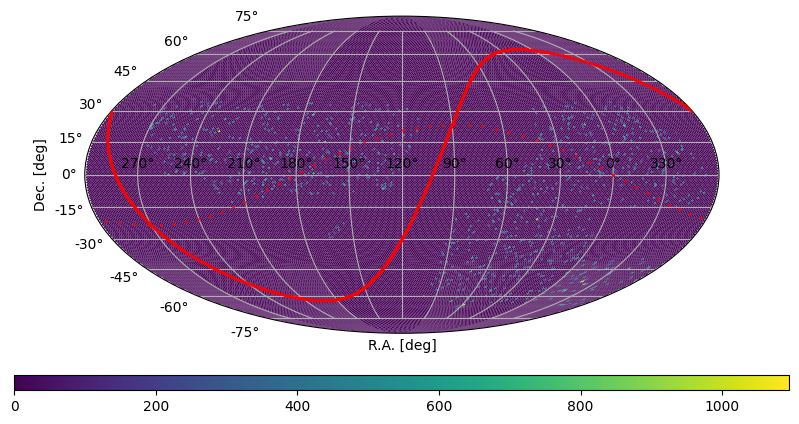

In [8]:
ax = plot_sky_binned(ra, dec, plot_type='healpix', max_bin_area=1, verbose=True)


### First Step: Identify which CCD is associated to which pixel

In [83]:
pixel2ccd_dict = {}
count_ex = 0

# In this function, I am first converting every CCD into a given polygon using its corner coordinates
# Afterwards, I am using the ang2vec function and the hp.query_polygon function, to identify every pixel that features the given CCD
# Then, I am creating a dictionary that lists all CCDs for a given pixel

for no in range(len(ra0)):#range(len(ra0)):
    x_coord_polygon = np.array([ra0[no],ra1[no], ra2[no], ra3[no]])
    y_coord_polygon = np.array([dec0[no],dec1[no], dec2[no], dec3[no]])
    theta, phi = raDec2thetaPhi(x_coord_polygon, y_coord_polygon)

    ccd_vertices_3d = hp.ang2vec(theta=theta, phi=phi)

    # Now, Im getting all healpy pixels that a given CCD covers
    try:
        pixels_for_ccd = hp.query_polygon(nside=NSIDE, vertices=ccd_vertices_3d, inclusive=True)
    except:
        count_ex += 1
        continue
    # This will give me the mapping CCD --> Pixel
    # Now, im reverting the mapping
    # For every pixel that a given CCD cuts, enter the CCD into the pixel dictionary
    # Mapping: Pixel --> CCDs
    for pixel in pixels_for_ccd:
        if pixel not in pixel2ccd_dict:
            pixel2ccd_dict[pixel] = []
        pixel2ccd_dict[pixel].append(no)

    if no % 40000 == 0:
        print(no, count_ex)

# Find out what happens to 2467 CCDs where query polygon throws unknown exception

0 0
40000 0
80000 0
120000 0
160000 0
200000 0
240000 0
280000 0
320000 0
360000 0
400000 0
440000 0
480000 0
520000 0
560000 0
600000 0
640000 0
680000 0
720000 0
760000 0
800000 0
840000 0
880000 0
920000 0
960000 0
1000000 0
1040000 0
1080000 0
1120000 0
1160000 0
1200000 1
1240000 1
1280000 1
1320000 1
1360000 1
1400000 1
1440000 1
1480000 1
1520000 1
1560000 1
1600000 2
1640000 5
1680000 11
1720000 11
1760000 16
1800000 34
1840000 34
1880000 34
1920000 34
1960000 34
2000000 41
2040000 41
2080000 41
2120000 41
2160000 43
2200000 43
2240000 43
2280000 43
2320000 43
2360000 124
2400000 124
2440000 125
2480000 125
2520000 125
2560000 125
2600000 154
2640000 154
2680000 154
2720000 154
2760000 154
2800000 154
2840000 154
2880000 154
2920000 154
2960000 154
3000000 154
3040000 184
3080000 184
3120000 184
3160000 184
3200000 184
3240000 185
3280000 185
3320000 187
3360000 187
3400000 615
3440000 674
3480000 677
3520000 679
3560000 679
3600000 693
3640000 693
3680000 693
3720000 693
37600

In [26]:
keys = list(pixel2ccd_dict.keys())
for k in keys[0:5]:
    print(pixel2ccd_dict[k])

[0, 2, 26844, 26845, 27432, 27673, 36862, 36863, 52231, 52253, 57214, 60158, 78362, 78363, 98468, 98470, 133601, 133756, 142080, 142081, 144417, 144455]
[0, 27415, 27673, 36862, 36863, 52231, 57212, 57214, 60156, 60158, 78362, 78363, 98468, 133601, 133711, 144455]
[0, 27415, 36860, 36861, 36862, 36863, 52142, 52229, 52231, 57212, 60156, 78360, 78361, 78362, 78363, 98468, 133711, 144453, 144455, 144694]
[0, 2, 26844, 26845, 27432, 36862, 36863, 52231, 52253, 57214, 57215, 60158, 60159, 78362, 78363, 98468, 98470, 133756, 142080, 142081, 144417, 144455]
[0, 26844, 26845, 36862, 36863, 52231, 57212, 57213, 57214, 57215, 60156, 60157, 60158, 60159, 78362, 78363, 98468, 142080, 142081, 144455]


In [84]:
#Exporting to Pickle, since this process only needs to be run once
#The filename number (e.g.256) indicates the NSIDE of the Healpy pixels used to generate the pixalisation

with open('../bricks_data/pixel2ccd_256.pickle', 'wb') as f:
    pickle.dump(pixel2ccd_dict, f)
    f.close()


# with open('pixel2ccd_256.pickle') as f:
    #data = pickle.load(f)

# Note that brickpixel2ccd files only feature Decals, pixel2ccd files also the two other surveys


#### Plotting the Boundaries of the different CCDs that are associated to an arbitrary pixel


110222
Number of CCDs that are cutting pixel number  170186 : 27


<ipython-input-35-bca168e5f1ab>:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pixel_boundary = hp.boundaries(nside=NSIDE, pix=pixel_number, step=1)
<ipython-input-35-bca168e5f1ab>:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#dep

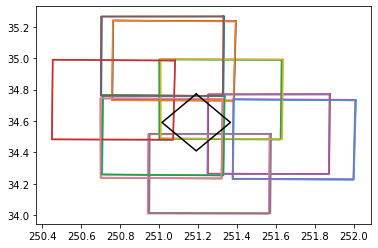

In [35]:
pixel_number = 170186
# print(pixel2ccd_dict.keys())
print(len(pixel2ccd_dict.keys()))

#for i, keys in enumerate(pixel2ccd_dict.keys()):
    #break
ccd = pixel2ccd_dict[pixel_number]
print("Number of CCDs that are cutting pixel number ", pixel_number, ":", len(ccd))
for cc in ccd:
#coord = [[x0,y0], [x1,y1], [x2,y2], [x3,y3], [x0,y0]]
    xs = [ra0[cc],ra1[cc], ra2[cc], ra3[cc],ra0[cc] ]
    ys = [dec0[cc],dec1[cc], dec2[cc], dec3[cc],dec0[cc]]
    plt.plot(xs,ys)
#if i > 3:
    #break
    
pixel_boundary = hp.boundaries(nside=NSIDE, pix=pixel_number, step=1)
pixel_boundary_raDec = hp.vec2ang(pixel_boundary.transpose(),lonlat=True)
pixel_boundary_raDec = list(pixel_boundary_raDec)
pixel_boundary_raDec[0] = np.append(pixel_boundary_raDec[0],pixel_boundary_raDec[0][0])
pixel_boundary_raDec[1] = np.append(pixel_boundary_raDec[1],pixel_boundary_raDec[1][0])


plt.plot(pixel_boundary_raDec[0],pixel_boundary_raDec[1], c='black', label="Pixel Boundary")

plt.show()

In [ ]:
print(NPIX)

### Mapping Smaller Subpixels to CCDs for Geometric Separation of Pixels

In [ ]:
subpixel2ccd_dict = {}
count_ex = 0
NSIDE_SUB = NSIDE * 8
NPIX_SUB = hp.nside2npix(NSIDE_SUB)

# In this function, I am first converting every CCD into a given polygon using its corner coordinates
# Afterwards, I am using the ang2vec function and the hp.query_polygon function, to identify every subpixel that features the given CCD
# Then, I am creating a dictionary that lists all CCDs for a given pixel

for no in range(len(ra0)):#range(len(ra0)):
    x_coord_polygon = np.array([ra0[no],ra1[no], ra2[no], ra3[no]])
    y_coord_polygon = np.array([dec0[no],dec1[no], dec2[no], dec3[no]])
    theta, phi = raDec2thetaPhi(x_coord_polygon, y_coord_polygon)

    ccd_vertices_3d = hp.ang2vec(theta=theta, phi=phi)

    # Now, Im getting all healpy pixels that a given CCD covers
    try:
        subpixels_for_ccd = hp.query_polygon(nside=NSIDE_SUB, vertices=ccd_vertices_3d, inclusive=True)
    except:
        count_ex += 1
        continue
    # This will give me the mapping CCD --> Pixel
    # Now, im reverting the mapping
    # For every pixel that a given CCD cuts, enter the CCD into the pixel dictionary
    # Mapping: Pixel --> CCDs
    for pixel in subpixels_for_ccd:
        if pixel not in subpixel2ccd_dict:
            subpixel2ccd_dict[pixel] = []
        subpixel2ccd_dict[pixel].append(no)

    if no % 40000 == 0:
        print(no, count_ex)

# Find out what happens to 2467 CCDs where query polygon throws unknown exception

0 0
40000 0
80000 0
120000 0
160000 0
200000 0
240000 0
280000 0
320000 0
360000 0
400000 0
440000 0
480000 0
520000 0
560000 0
600000 0
640000 0
680000 0
720000 0
760000 0
800000 0
840000 0
880000 0
920000 0
960000 0
1000000 0
1040000 0
1080000 0
1120000 0
1160000 0
1200000 1
1240000 1
1280000 1
1320000 1
1360000 1
1400000 1
1440000 1
1480000 1
1520000 1
1560000 1
1600000 2
1640000 5
1680000 11
1720000 11
1760000 16
1800000 34
1840000 34
1880000 34
1920000 34
1960000 34
2000000 41
2040000 41
2080000 41
2120000 41
2160000 43
2200000 43
2240000 43
2280000 43
2320000 43
2360000 124
2400000 124
2440000 125
2480000 125
2520000 125
2560000 125
2600000 154
2640000 154
2680000 154
2720000 154
2760000 154
2800000 154
2840000 154
2880000 154
2920000 154
2960000 154
3000000 154
3040000 184
3080000 184
3120000 184
3160000 184
3200000 184
3240000 185
3280000 185
3320000 187
3360000 187
3400000 615
3440000 674
3480000 677
3520000 679
3560000 679
3600000 693
3640000 693
3680000 693
3720000 693
37600

In [ ]:
with open('../bricks_data/pixel2ccd_2048.pickle', 'wb') as f:
    pickle.dump(subpixel2ccd_dict, f)
    f.close()


In [ ]:
# Validate the subpixel2ccd_dict is correct
# For any pixel you try, the ccds for subpixel should be a subset of ccds for pixel

subpixel_keys = subpixel2ccd_dict.keys()
print(len(subpixel_keys))
print("All subpixels for pixel:", pixel2subpixel_dict[459294])
print("All CCD's for pixel:", pixel2ccd_dict[459294])
print("All CCD's for subpixel:", subpixel2ccd_dict[29364464])

